In [3]:
import fastbook
fastbook.setup_book()
from fastbook import *

In [5]:
urls=search_images_ddg('bird photos', max_images=1)
len(urls),urls[0]

(1,
 'http://2.bp.blogspot.com/_4NJHd2GlpUw/S9-QcyqZnBI/AAAAAAAAB5E/Kq7xXnqkV-w/s1600/Cardinal-Norther,+male+IMG_0048b.jpg')

In [7]:
dest=Path('bird.jpg')
if not dest.exists(): download_url(urls[0], dest, show_progress=False)

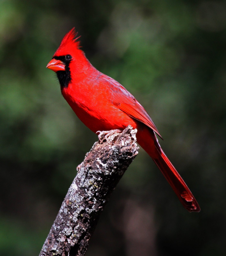

In [8]:
im=Image.open(dest)
im.to_thumb(256,256)

In [58]:
#key='AqItEIAmD87bFqNsCzE2MUk8WGIHpGtk5ik6RZVi0gpFEVYEAzkOZbVIqZMsbvaj'
searches='forest','bird'
path=Path('bird_or_not')
print(path)
if not path.exists():
    #path.mkdir() # fix from textbook
    for o in searches:
        dest=(path/o)
        print(dest)
        dest.mkdir(exist_ok=True, parents=True)
        #results=search_images_bing(key,f'{o} photo')
        #download_images(dest,urls=results.attrgot('content.url'))
        results=search_images_ddg(f'{o} photo')
        download_images(dest, urls=results[:200])
        resize_images(dest, max_size=400, dest=dest)
        

bird_or_not
bird_or_not\forest
bird_or_not\bird


In [59]:
fns=get_image_files(path)
fns

(#356) [Path('bird_or_not/bird/02e54a33-8b62-413a-9dff-84ab61f52004.jpg'),Path('bird_or_not/bird/035aabb7-7788-4182-85d4-045f8246633e.jpg'),Path('bird_or_not/bird/0404c5ac-028c-411f-9eee-b85336e074b2.jpg'),Path('bird_or_not/bird/04bc8e43-0921-4500-bcdd-33cb57ee1722.jpg'),Path('bird_or_not/bird/04eefdee-8f5d-46b3-9d30-f6c07a690d77.jpg'),Path('bird_or_not/bird/077249e7-f48f-4549-ae22-c51f52d57351.jpg'),Path('bird_or_not/bird/08dcc4d2-1632-44ad-860d-b60c71e31ec8.jpg'),Path('bird_or_not/bird/0b9aae4d-3caf-4e17-8acb-2c47dbcc6120.jpg'),Path('bird_or_not/bird/0bb5c144-904b-4884-af7a-f41bd2e14d74.jpg'),Path('bird_or_not/bird/0cda571a-1a1c-49db-84bf-397040b0cf2c.jpg')...]

In [54]:
print(path)

bird_or_not


In [60]:
failed=verify_images(get_image_files(path))
failed.map(Path.unlink)

(#5) [None,None,None,None,None]

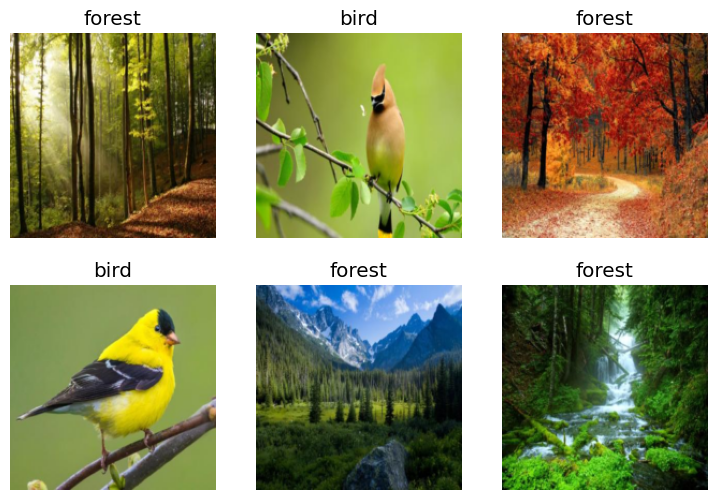

In [61]:
dls=DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

In [64]:
learn = vision_learner(dls,resnet18,metrics=error_rate)#renamed from old function cnn_learner
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.059128,0.263034,0.128571,00:37


epoch,train_loss,valid_loss,error_rate,time
0,0.057172,0.024376,0.000000,00:45
1,0.028030,0.001143,0.000000,00:45
2,0.018126,0.000235,0.000000,00:43


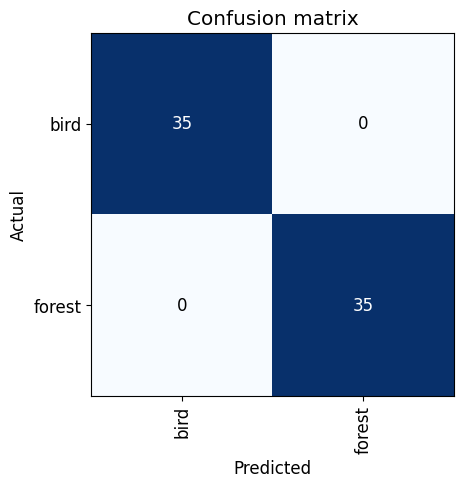

In [66]:
interp=ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [65]:
is_bird,_,probs = learn.predict(PILImage.create('bird.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability its a bird: {probs[0]:.4f}")

This is a: bird.
Probability its a bird: 1.0000
